In [1]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [2]:
us = environment.UserSettings()
#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
%load_ext music21.ipython21

In [ ]:
s = corpus.parse('bach/bwv65.2.xml')

s.analyze('key')
s.show('midi')

In [ ]:
s.show()

score sは４つのPartから構成される（上記の例だと楽器ごとにひとつずつPartがある）

In [ ]:
[type(x) for x in s.getElementsByClass(stream.Stream)] #a lot of "Part"s

Partはmeasure(小節)から成る
unlike the deepjazz example, each Parts consists of "Measure"s

In [ ]:
[[type(y) for y in x.getElementsByClass(stream.Stream)] for x in s.getElementsByClass(stream.Stream)]

In [ ]:
s2 = [(x) for x  in s.flat.getElementsByClass(note.Note)]#example of how to flatten the scoreb

In [ ]:
print(type(s2))#score

scoreとPartとMeasureがstreamの基本的なsubclass

scoreがpartを複数含み、partはmeasureを複数持つ

In [ ]:
s_parts = [x for x in s.parts]
measures = [x for x in s_parts[0].getElementsByClass(stream.Measure)]
type(measures[0])

# シンプルな例からスタート

insert works as expected if it is "Note to Stream"

In [3]:
st1=stream.Stream()
st1.insert(0,note.Note("B-5"))

In [ ]:
st1.show()

In [ ]:
st1.insert(1,note.Note("B-4"))
st1.insert(2,note.Note("B#3"))
st1.insert(4 , note.Note("B3"))
st1.insert(4 , note.Note("B2"))
st1.insert(5 , note.Note("C4"))
st1.show()

C4をMajor 3rd(長三度)だけシフトした音すなわちE4を追加

In [4]:
st1.insert(6 , note.Note("C4").transpose("M3"))

E4をdouble diminished 6th（重減６度？）だけシフトした音を追加

なお、例えばC4の重減六度なるものは存在しないっぽい。したがって普通にラ（短６度）がappendされてしまう。


http://guitarchord-lab.com/theory/interval.html

https://ja.wikipedia.org/wiki/%E9%9F%B3%E7%A8%8B

などを見て解明が必要・・

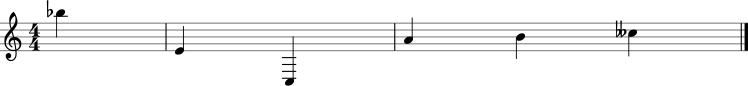

In [9]:
st1.append(note.Note("E4").transpose("dd6"))
st1.show()

appendは最後に追加してくれるので位置の指定をしなくてよくて便利

In [ ]:
st1.append(note.Note("C4"))
st1.show()

offsetの範囲を調べるには以下のようにすればいいだろう（？）

In [11]:
max_offset = max([x.offset for x in st1])
print(max_offset)

12.0


最後に付け加えるのをinsertでやるのであれば、以下のようにすればよいだろう

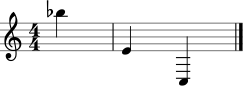

In [6]:
st1.insert(max_offset + 1 , note.Note("C3"))
st1.show()

appendは以下のようにまとめて行うことができる（ただし、和音を付け加えるような動作ではない）

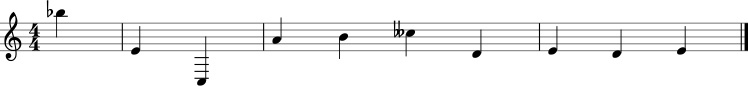

In [14]:
st1.append([note.Note("D4") , note.Note("E4")])
st1.show()

以下のように和音を追加することはできない・・

In [12]:
st1.insert(max_offset + 1 , [note.Note("D4") , note.Note("E4")])
st1.show()

StreamException: to put a non Music21Object in a stream, create a music21.ElementWrapper for the item

## tinynotationについて

In [ ]:
p = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")

In [ ]:
s2 = stream.Stream()
s2.insert(0  , p)#adding part, first argument should be offset??

In [ ]:
s2.show()

In [ ]:
q=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(100,q)

## 

In [ ]:
s2.show()

In [ ]:
r=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(10,r)
s2.show()

In [ ]:
s2.insert?